In [ ]:
import numpy as np
import torch
from modules.preprocessing import BRATSDataModule

from omegaconf import OmegaConf

cfg = OmegaConf.load('./config.yaml')

dm = BRATSDataModule(**cfg.data.first_stage, slice_idx=32)
dm.prepare_data()
dm.setup()

In [1]:
import numpy as np
from modules.autoencoder.vector_quantized_autoencoder import VQAutoencoder
from omegaconf import OmegaConf

cfg = OmegaConf.load('./config.yaml')

ae = VQAutoencoder(**cfg.autoencoder)

loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


In [1]:
from modules.preprocessing import MNIST3DDataModule

dm = MNIST3DDataModule(
    npy_path='./data/3dmnist.npz',
    train_size=0.8,
    batch_size=32,
    num_workers=6,
    shuffle=True
)

dm.prepare_data()
dm.setup()

Train dataset size: 153600
Val dataset size: 38400
Data shape: torch.Size([153600, 1, 16, 16])


In [50]:
import numpy as np
data = np.load('./data/3dmnist.npz')
x = data['x']

In [56]:
x = x.transpose(0, 3, 1, 2)
x = x.reshape(-1, 16, 16)

/home/aghiles/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


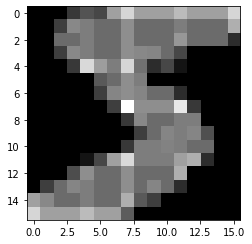

In [57]:
import matplotlib.pyplot as plt

plt.imshow(x[5, :, :], cmap='gray')

In [11]:
ckpt = torch.load('./checkpoints/autoencoder-VQAutoencoder-v1.ckpt')
ckpt.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters', 'datamodule_hparams_name', 'datamodule_hyper_parameters'])

In [12]:
ae.load_state_dict(ckpt['state_dict'])

RuntimeError: Error(s) in loading state_dict for VQAutoencoder:
	Missing key(s) in state_dict: "encoder.in_conv.weight", "encoder.in_conv.bias", "encoder.enocoder.0.resnet.0.temb_proj.1.weight", "encoder.enocoder.0.resnet.0.temb_proj.1.bias", "encoder.enocoder.0.resnet.0.block_a.norm.weight", "encoder.enocoder.0.resnet.0.block_a.norm.bias", "encoder.enocoder.0.resnet.0.block_a.conv.weight", "encoder.enocoder.0.resnet.0.block_a.conv.bias", "encoder.enocoder.0.resnet.0.block_b.norm.weight", "encoder.enocoder.0.resnet.0.block_b.norm.bias", "encoder.enocoder.0.resnet.0.block_b.conv.weight", "encoder.enocoder.0.resnet.0.block_b.conv.bias", "encoder.enocoder.0.resnet.1.temb_proj.1.weight", "encoder.enocoder.0.resnet.1.temb_proj.1.bias", "encoder.enocoder.0.resnet.1.block_a.norm.weight", "encoder.enocoder.0.resnet.1.block_a.norm.bias", "encoder.enocoder.0.resnet.1.block_a.conv.weight", "encoder.enocoder.0.resnet.1.block_a.conv.bias", "encoder.enocoder.0.resnet.1.block_b.norm.weight", "encoder.enocoder.0.resnet.1.block_b.norm.bias", "encoder.enocoder.0.resnet.1.block_b.conv.weight", "encoder.enocoder.0.resnet.1.block_b.conv.bias", "encoder.enocoder.0.downsample.downsampler.weight", "encoder.enocoder.0.downsample.downsampler.bias", "encoder.enocoder.1.resnet.0.temb_proj.1.weight", "encoder.enocoder.1.resnet.0.temb_proj.1.bias", "encoder.enocoder.1.resnet.0.block_a.norm.weight", "encoder.enocoder.1.resnet.0.block_a.norm.bias", "encoder.enocoder.1.resnet.0.block_a.conv.weight", "encoder.enocoder.1.resnet.0.block_a.conv.bias", "encoder.enocoder.1.resnet.0.block_b.norm.weight", "encoder.enocoder.1.resnet.0.block_b.norm.bias", "encoder.enocoder.1.resnet.0.block_b.conv.weight", "encoder.enocoder.1.resnet.0.block_b.conv.bias", "encoder.enocoder.1.resnet.0.residual_proj.weight", "encoder.enocoder.1.resnet.0.residual_proj.bias", "encoder.enocoder.1.resnet.1.temb_proj.1.weight", "encoder.enocoder.1.resnet.1.temb_proj.1.bias", "encoder.enocoder.1.resnet.1.block_a.norm.weight", "encoder.enocoder.1.resnet.1.block_a.norm.bias", "encoder.enocoder.1.resnet.1.block_a.conv.weight", "encoder.enocoder.1.resnet.1.block_a.conv.bias", "encoder.enocoder.1.resnet.1.block_b.norm.weight", "encoder.enocoder.1.resnet.1.block_b.norm.bias", "encoder.enocoder.1.resnet.1.block_b.conv.weight", "encoder.enocoder.1.resnet.1.block_b.conv.bias", "encoder.enocoder.1.downsample.downsampler.weight", "encoder.enocoder.1.downsample.downsampler.bias", "encoder.enocoder.2.resnet.0.temb_proj.1.weight", "encoder.enocoder.2.resnet.0.temb_proj.1.bias", "encoder.enocoder.2.resnet.0.block_a.norm.weight", "encoder.enocoder.2.resnet.0.block_a.norm.bias", "encoder.enocoder.2.resnet.0.block_a.conv.weight", "encoder.enocoder.2.resnet.0.block_a.conv.bias", "encoder.enocoder.2.resnet.0.block_b.norm.weight", "encoder.enocoder.2.resnet.0.block_b.norm.bias", "encoder.enocoder.2.resnet.0.block_b.conv.weight", "encoder.enocoder.2.resnet.0.block_b.conv.bias", "encoder.enocoder.2.resnet.0.residual_proj.weight", "encoder.enocoder.2.resnet.0.residual_proj.bias", "encoder.enocoder.2.resnet.1.temb_proj.1.weight", "encoder.enocoder.2.resnet.1.temb_proj.1.bias", "encoder.enocoder.2.resnet.1.block_a.norm.weight", "encoder.enocoder.2.resnet.1.block_a.norm.bias", "encoder.enocoder.2.resnet.1.block_a.conv.weight", "encoder.enocoder.2.resnet.1.block_a.conv.bias", "encoder.enocoder.2.resnet.1.block_b.norm.weight", "encoder.enocoder.2.resnet.1.block_b.norm.bias", "encoder.enocoder.2.resnet.1.block_b.conv.weight", "encoder.enocoder.2.resnet.1.block_b.conv.bias", "encoder.enocoder.2.attn.0.q.weight", "encoder.enocoder.2.attn.0.q.bias", "encoder.enocoder.2.attn.0.k.weight", "encoder.enocoder.2.attn.0.k.bias", "encoder.enocoder.2.attn.0.v.weight", "encoder.enocoder.2.attn.0.v.bias", "encoder.enocoder.2.attn.0.norm.weight", "encoder.enocoder.2.attn.0.norm.bias", "encoder.enocoder.2.attn.0.proj.weight", "encoder.enocoder.2.attn.0.proj.bias", "encoder.enocoder.2.attn.1.q.weight", "encoder.enocoder.2.attn.1.q.bias", "encoder.enocoder.2.attn.1.k.weight", "encoder.enocoder.2.attn.1.k.bias", "encoder.enocoder.2.attn.1.v.weight", "encoder.enocoder.2.attn.1.v.bias", "encoder.enocoder.2.attn.1.norm.weight", "encoder.enocoder.2.attn.1.norm.bias", "encoder.enocoder.2.attn.1.proj.weight", "encoder.enocoder.2.attn.1.proj.bias", "encoder.bottleneck_res_a.temb_proj.1.weight", "encoder.bottleneck_res_a.temb_proj.1.bias", "encoder.bottleneck_res_a.block_a.norm.weight", "encoder.bottleneck_res_a.block_a.norm.bias", "encoder.bottleneck_res_a.block_a.conv.weight", "encoder.bottleneck_res_a.block_a.conv.bias", "encoder.bottleneck_res_a.block_b.norm.weight", "encoder.bottleneck_res_a.block_b.norm.bias", "encoder.bottleneck_res_a.block_b.conv.weight", "encoder.bottleneck_res_a.block_b.conv.bias", "encoder.bottleneck_sa.q.weight", "encoder.bottleneck_sa.q.bias", "encoder.bottleneck_sa.k.weight", "encoder.bottleneck_sa.k.bias", "encoder.bottleneck_sa.v.weight", "encoder.bottleneck_sa.v.bias", "encoder.bottleneck_sa.norm.weight", "encoder.bottleneck_sa.norm.bias", "encoder.bottleneck_sa.proj.weight", "encoder.bottleneck_sa.proj.bias", "encoder.bottleneck_res_b.temb_proj.1.weight", "encoder.bottleneck_res_b.temb_proj.1.bias", "encoder.bottleneck_res_b.block_a.norm.weight", "encoder.bottleneck_res_b.block_a.norm.bias", "encoder.bottleneck_res_b.block_a.conv.weight", "encoder.bottleneck_res_b.block_a.conv.bias", "encoder.bottleneck_res_b.block_b.norm.weight", "encoder.bottleneck_res_b.block_b.norm.bias", "encoder.bottleneck_res_b.block_b.conv.weight", "encoder.bottleneck_res_b.block_b.conv.bias", "encoder.out_conv.0.weight", "encoder.out_conv.0.bias", "encoder.out_conv.2.weight", "encoder.out_conv.2.bias". 
	Unexpected key(s) in state_dict: "encoders.0.in_conv.weight", "encoders.0.in_conv.bias", "encoders.0.enocoder.0.resnet.0.temb_proj.1.weight", "encoders.0.enocoder.0.resnet.0.temb_proj.1.bias", "encoders.0.enocoder.0.resnet.0.block_a.conv.weight", "encoders.0.enocoder.0.resnet.0.block_a.conv.bias", "encoders.0.enocoder.0.resnet.0.block_a.norm.weight", "encoders.0.enocoder.0.resnet.0.block_a.norm.bias", "encoders.0.enocoder.0.resnet.0.block_b.conv.weight", "encoders.0.enocoder.0.resnet.0.block_b.conv.bias", "encoders.0.enocoder.0.resnet.0.block_b.norm.weight", "encoders.0.enocoder.0.resnet.0.block_b.norm.bias", "encoders.0.enocoder.0.resnet.1.temb_proj.1.weight", "encoders.0.enocoder.0.resnet.1.temb_proj.1.bias", "encoders.0.enocoder.0.resnet.1.block_a.conv.weight", "encoders.0.enocoder.0.resnet.1.block_a.conv.bias", "encoders.0.enocoder.0.resnet.1.block_a.norm.weight", "encoders.0.enocoder.0.resnet.1.block_a.norm.bias", "encoders.0.enocoder.0.resnet.1.block_b.conv.weight", "encoders.0.enocoder.0.resnet.1.block_b.conv.bias", "encoders.0.enocoder.0.resnet.1.block_b.norm.weight", "encoders.0.enocoder.0.resnet.1.block_b.norm.bias", "encoders.0.enocoder.0.downsample.downsampler.weight", "encoders.0.enocoder.0.downsample.downsampler.bias", "encoders.0.enocoder.1.resnet.0.temb_proj.1.weight", "encoders.0.enocoder.1.resnet.0.temb_proj.1.bias", "encoders.0.enocoder.1.resnet.0.block_a.conv.weight", "encoders.0.enocoder.1.resnet.0.block_a.conv.bias", "encoders.0.enocoder.1.resnet.0.block_a.norm.weight", "encoders.0.enocoder.1.resnet.0.block_a.norm.bias", "encoders.0.enocoder.1.resnet.0.block_b.conv.weight", "encoders.0.enocoder.1.resnet.0.block_b.conv.bias", "encoders.0.enocoder.1.resnet.0.block_b.norm.weight", "encoders.0.enocoder.1.resnet.0.block_b.norm.bias", "encoders.0.enocoder.1.resnet.0.residual_proj.weight", "encoders.0.enocoder.1.resnet.0.residual_proj.bias", "encoders.0.enocoder.1.resnet.1.temb_proj.1.weight", "encoders.0.enocoder.1.resnet.1.temb_proj.1.bias", "encoders.0.enocoder.1.resnet.1.block_a.conv.weight", "encoders.0.enocoder.1.resnet.1.block_a.conv.bias", "encoders.0.enocoder.1.resnet.1.block_a.norm.weight", "encoders.0.enocoder.1.resnet.1.block_a.norm.bias", "encoders.0.enocoder.1.resnet.1.block_b.conv.weight", "encoders.0.enocoder.1.resnet.1.block_b.conv.bias", "encoders.0.enocoder.1.resnet.1.block_b.norm.weight", "encoders.0.enocoder.1.resnet.1.block_b.norm.bias", "encoders.0.enocoder.1.downsample.downsampler.weight", "encoders.0.enocoder.1.downsample.downsampler.bias", "encoders.0.enocoder.2.resnet.0.temb_proj.1.weight", "encoders.0.enocoder.2.resnet.0.temb_proj.1.bias", "encoders.0.enocoder.2.resnet.0.block_a.conv.weight", "encoders.0.enocoder.2.resnet.0.block_a.conv.bias", "encoders.0.enocoder.2.resnet.0.block_a.norm.weight", "encoders.0.enocoder.2.resnet.0.block_a.norm.bias", "encoders.0.enocoder.2.resnet.0.block_b.conv.weight", "encoders.0.enocoder.2.resnet.0.block_b.conv.bias", "encoders.0.enocoder.2.resnet.0.block_b.norm.weight", "encoders.0.enocoder.2.resnet.0.block_b.norm.bias", "encoders.0.enocoder.2.resnet.0.residual_proj.weight", "encoders.0.enocoder.2.resnet.0.residual_proj.bias", "encoders.0.enocoder.2.resnet.1.temb_proj.1.weight", "encoders.0.enocoder.2.resnet.1.temb_proj.1.bias", "encoders.0.enocoder.2.resnet.1.block_a.conv.weight", "encoders.0.enocoder.2.resnet.1.block_a.conv.bias", "encoders.0.enocoder.2.resnet.1.block_a.norm.weight", "encoders.0.enocoder.2.resnet.1.block_a.norm.bias", "encoders.0.enocoder.2.resnet.1.block_b.conv.weight", "encoders.0.enocoder.2.resnet.1.block_b.conv.bias", "encoders.0.enocoder.2.resnet.1.block_b.norm.weight", "encoders.0.enocoder.2.resnet.1.block_b.norm.bias", "encoders.0.enocoder.2.attn.0.q.weight", "encoders.0.enocoder.2.attn.0.q.bias", "encoders.0.enocoder.2.attn.0.k.weight", "encoders.0.enocoder.2.attn.0.k.bias", "encoders.0.enocoder.2.attn.0.v.weight", "encoders.0.enocoder.2.attn.0.v.bias", "encoders.0.enocoder.2.attn.0.norm.weight", "encoders.0.enocoder.2.attn.0.norm.bias", "encoders.0.enocoder.2.attn.0.proj.weight", "encoders.0.enocoder.2.attn.0.proj.bias", "encoders.0.enocoder.2.attn.1.q.weight", "encoders.0.enocoder.2.attn.1.q.bias", "encoders.0.enocoder.2.attn.1.k.weight", "encoders.0.enocoder.2.attn.1.k.bias", "encoders.0.enocoder.2.attn.1.v.weight", "encoders.0.enocoder.2.attn.1.v.bias", "encoders.0.enocoder.2.attn.1.norm.weight", "encoders.0.enocoder.2.attn.1.norm.bias", "encoders.0.enocoder.2.attn.1.proj.weight", "encoders.0.enocoder.2.attn.1.proj.bias", "encoders.0.bottleneck_res_a.temb_proj.1.weight", "encoders.0.bottleneck_res_a.temb_proj.1.bias", "encoders.0.bottleneck_res_a.block_a.conv.weight", "encoders.0.bottleneck_res_a.block_a.conv.bias", "encoders.0.bottleneck_res_a.block_a.norm.weight", "encoders.0.bottleneck_res_a.block_a.norm.bias", "encoders.0.bottleneck_res_a.block_b.conv.weight", "encoders.0.bottleneck_res_a.block_b.conv.bias", "encoders.0.bottleneck_res_a.block_b.norm.weight", "encoders.0.bottleneck_res_a.block_b.norm.bias", "encoders.0.bottleneck_sa.q.weight", "encoders.0.bottleneck_sa.q.bias", "encoders.0.bottleneck_sa.k.weight", "encoders.0.bottleneck_sa.k.bias", "encoders.0.bottleneck_sa.v.weight", "encoders.0.bottleneck_sa.v.bias", "encoders.0.bottleneck_sa.norm.weight", "encoders.0.bottleneck_sa.norm.bias", "encoders.0.bottleneck_sa.proj.weight", "encoders.0.bottleneck_sa.proj.bias", "encoders.0.bottleneck_res_b.temb_proj.1.weight", "encoders.0.bottleneck_res_b.temb_proj.1.bias", "encoders.0.bottleneck_res_b.block_a.conv.weight", "encoders.0.bottleneck_res_b.block_a.conv.bias", "encoders.0.bottleneck_res_b.block_a.norm.weight", "encoders.0.bottleneck_res_b.block_a.norm.bias", "encoders.0.bottleneck_res_b.block_b.conv.weight", "encoders.0.bottleneck_res_b.block_b.conv.bias", "encoders.0.bottleneck_res_b.block_b.norm.weight", "encoders.0.bottleneck_res_b.block_b.norm.bias", "encoders.0.out_conv.0.weight", "encoders.0.out_conv.0.bias", "encoders.0.out_conv.2.weight", "encoders.0.out_conv.2.bias", "encoders.1.in_conv.weight", "encoders.1.in_conv.bias", "encoders.1.enocoder.0.resnet.0.temb_proj.1.weight", "encoders.1.enocoder.0.resnet.0.temb_proj.1.bias", "encoders.1.enocoder.0.resnet.0.block_a.conv.weight", "encoders.1.enocoder.0.resnet.0.block_a.conv.bias", "encoders.1.enocoder.0.resnet.0.block_a.norm.weight", "encoders.1.enocoder.0.resnet.0.block_a.norm.bias", "encoders.1.enocoder.0.resnet.0.block_b.conv.weight", "encoders.1.enocoder.0.resnet.0.block_b.conv.bias", "encoders.1.enocoder.0.resnet.0.block_b.norm.weight", "encoders.1.enocoder.0.resnet.0.block_b.norm.bias", "encoders.1.enocoder.0.resnet.1.temb_proj.1.weight", "encoders.1.enocoder.0.resnet.1.temb_proj.1.bias", "encoders.1.enocoder.0.resnet.1.block_a.conv.weight", "encoders.1.enocoder.0.resnet.1.block_a.conv.bias", "encoders.1.enocoder.0.resnet.1.block_a.norm.weight", "encoders.1.enocoder.0.resnet.1.block_a.norm.bias", "encoders.1.enocoder.0.resnet.1.block_b.conv.weight", "encoders.1.enocoder.0.resnet.1.block_b.conv.bias", "encoders.1.enocoder.0.resnet.1.block_b.norm.weight", "encoders.1.enocoder.0.resnet.1.block_b.norm.bias", "encoders.1.enocoder.0.downsample.downsampler.weight", "encoders.1.enocoder.0.downsample.downsampler.bias", "encoders.1.enocoder.1.resnet.0.temb_proj.1.weight", "encoders.1.enocoder.1.resnet.0.temb_proj.1.bias", "encoders.1.enocoder.1.resnet.0.block_a.conv.weight", "encoders.1.enocoder.1.resnet.0.block_a.conv.bias", "encoders.1.enocoder.1.resnet.0.block_a.norm.weight", "encoders.1.enocoder.1.resnet.0.block_a.norm.bias", "encoders.1.enocoder.1.resnet.0.block_b.conv.weight", "encoders.1.enocoder.1.resnet.0.block_b.conv.bias", "encoders.1.enocoder.1.resnet.0.block_b.norm.weight", "encoders.1.enocoder.1.resnet.0.block_b.norm.bias", "encoders.1.enocoder.1.resnet.0.residual_proj.weight", "encoders.1.enocoder.1.resnet.0.residual_proj.bias", "encoders.1.enocoder.1.resnet.1.temb_proj.1.weight", "encoders.1.enocoder.1.resnet.1.temb_proj.1.bias", "encoders.1.enocoder.1.resnet.1.block_a.conv.weight", "encoders.1.enocoder.1.resnet.1.block_a.conv.bias", "encoders.1.enocoder.1.resnet.1.block_a.norm.weight", "encoders.1.enocoder.1.resnet.1.block_a.norm.bias", "encoders.1.enocoder.1.resnet.1.block_b.conv.weight", "encoders.1.enocoder.1.resnet.1.block_b.conv.bias", "encoders.1.enocoder.1.resnet.1.block_b.norm.weight", "encoders.1.enocoder.1.resnet.1.block_b.norm.bias", "encoders.1.enocoder.1.downsample.downsampler.weight", "encoders.1.enocoder.1.downsample.downsampler.bias", "encoders.1.enocoder.2.resnet.0.temb_proj.1.weight", "encoders.1.enocoder.2.resnet.0.temb_proj.1.bias", "encoders.1.enocoder.2.resnet.0.block_a.conv.weight", "encoders.1.enocoder.2.resnet.0.block_a.conv.bias", "encoders.1.enocoder.2.resnet.0.block_a.norm.weight", "encoders.1.enocoder.2.resnet.0.block_a.norm.bias", "encoders.1.enocoder.2.resnet.0.block_b.conv.weight", "encoders.1.enocoder.2.resnet.0.block_b.conv.bias", "encoders.1.enocoder.2.resnet.0.block_b.norm.weight", "encoders.1.enocoder.2.resnet.0.block_b.norm.bias", "encoders.1.enocoder.2.resnet.0.residual_proj.weight", "encoders.1.enocoder.2.resnet.0.residual_proj.bias", "encoders.1.enocoder.2.resnet.1.temb_proj.1.weight", "encoders.1.enocoder.2.resnet.1.temb_proj.1.bias", "encoders.1.enocoder.2.resnet.1.block_a.conv.weight", "encoders.1.enocoder.2.resnet.1.block_a.conv.bias", "encoders.1.enocoder.2.resnet.1.block_a.norm.weight", "encoders.1.enocoder.2.resnet.1.block_a.norm.bias", "encoders.1.enocoder.2.resnet.1.block_b.conv.weight", "encoders.1.enocoder.2.resnet.1.block_b.conv.bias", "encoders.1.enocoder.2.resnet.1.block_b.norm.weight", "encoders.1.enocoder.2.resnet.1.block_b.norm.bias", "encoders.1.enocoder.2.attn.0.q.weight", "encoders.1.enocoder.2.attn.0.q.bias", "encoders.1.enocoder.2.attn.0.k.weight", "encoders.1.enocoder.2.attn.0.k.bias", "encoders.1.enocoder.2.attn.0.v.weight", "encoders.1.enocoder.2.attn.0.v.bias", "encoders.1.enocoder.2.attn.0.norm.weight", "encoders.1.enocoder.2.attn.0.norm.bias", "encoders.1.enocoder.2.attn.0.proj.weight", "encoders.1.enocoder.2.attn.0.proj.bias", "encoders.1.enocoder.2.attn.1.q.weight", "encoders.1.enocoder.2.attn.1.q.bias", "encoders.1.enocoder.2.attn.1.k.weight", "encoders.1.enocoder.2.attn.1.k.bias", "encoders.1.enocoder.2.attn.1.v.weight", "encoders.1.enocoder.2.attn.1.v.bias", "encoders.1.enocoder.2.attn.1.norm.weight", "encoders.1.enocoder.2.attn.1.norm.bias", "encoders.1.enocoder.2.attn.1.proj.weight", "encoders.1.enocoder.2.attn.1.proj.bias", "encoders.1.bottleneck_res_a.temb_proj.1.weight", "encoders.1.bottleneck_res_a.temb_proj.1.bias", "encoders.1.bottleneck_res_a.block_a.conv.weight", "encoders.1.bottleneck_res_a.block_a.conv.bias", "encoders.1.bottleneck_res_a.block_a.norm.weight", "encoders.1.bottleneck_res_a.block_a.norm.bias", "encoders.1.bottleneck_res_a.block_b.conv.weight", "encoders.1.bottleneck_res_a.block_b.conv.bias", "encoders.1.bottleneck_res_a.block_b.norm.weight", "encoders.1.bottleneck_res_a.block_b.norm.bias", "encoders.1.bottleneck_sa.q.weight", "encoders.1.bottleneck_sa.q.bias", "encoders.1.bottleneck_sa.k.weight", "encoders.1.bottleneck_sa.k.bias", "encoders.1.bottleneck_sa.v.weight", "encoders.1.bottleneck_sa.v.bias", "encoders.1.bottleneck_sa.norm.weight", "encoders.1.bottleneck_sa.norm.bias", "encoders.1.bottleneck_sa.proj.weight", "encoders.1.bottleneck_sa.proj.bias", "encoders.1.bottleneck_res_b.temb_proj.1.weight", "encoders.1.bottleneck_res_b.temb_proj.1.bias", "encoders.1.bottleneck_res_b.block_a.conv.weight", "encoders.1.bottleneck_res_b.block_a.conv.bias", "encoders.1.bottleneck_res_b.block_a.norm.weight", "encoders.1.bottleneck_res_b.block_a.norm.bias", "encoders.1.bottleneck_res_b.block_b.conv.weight", "encoders.1.bottleneck_res_b.block_b.conv.bias", "encoders.1.bottleneck_res_b.block_b.norm.weight", "encoders.1.bottleneck_res_b.block_b.norm.bias", "encoders.1.out_conv.0.weight", "encoders.1.out_conv.0.bias", "encoders.1.out_conv.2.weight", "encoders.1.out_conv.2.bias". 
	size mismatch for quant_conv.weight: copying a param with shape torch.Size([2, 4, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 2, 1, 1]).
	size mismatch for post_quant_conv.weight: copying a param with shape torch.Size([4, 2, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 2, 1, 1]).
	size mismatch for post_quant_conv.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([2]).
	size mismatch for decoder.in_conv.weight: copying a param with shape torch.Size([512, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 2, 3, 3]).
	size mismatch for decoder.decoder.0.resnet.0.block_a.norm.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.decoder.0.resnet.0.block_a.norm.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.decoder.1.resnet.0.block_a.norm.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for decoder.decoder.1.resnet.0.block_a.norm.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).